In [3]:
# Basic building-block packages
import numpy as np

# For numerical solutions of ODEs
from scipy.integrate import solve_ivp

# Fancy-smansy maths
from scipy.stats import linregress
from numpy.linalg import norm

# For pretty-pretty graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Quality of life shit
from tqdm import tqdm

# For FFT
import scipy.fftpack as fft

## Simulated Lorenz System

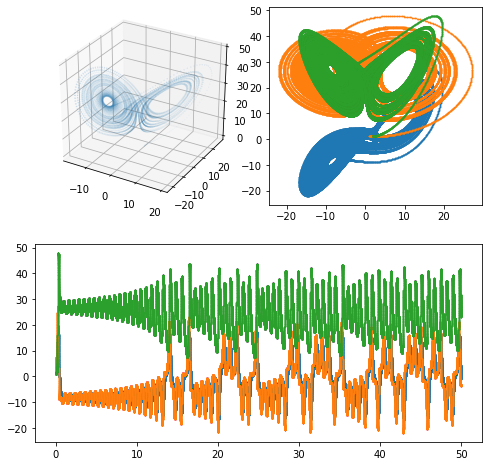

In [4]:
def sys_DE(t,w,sigma,rho,beta):
    """
    Defines Chua's equations

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,z]
        t :  time
    """
    x,y,z = w
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    return dx,dy,dz

t_span = (0,50)
t_eval = np.linspace(*t_span,int(1e5)) # No need to be so fine like here. 
xyz0 = [2,1,1] # Recall that z is in Amperes (a large unit).
solution = solve_ivp(sys_DE,t_span,xyz0,t_eval=t_eval,first_step=1e-7,
                     args=[10,28,8/3])

x_sol = solution.y[0]
y_sol = solution.y[1]
z_sol = solution.y[2]
time = solution.t

# Plot the solutions

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,2,wspace=0.1,)

axs1 = fig.add_subplot(grid[0,0], projection='3d')
axs2 = plt.subplot(grid[0,1])
axs3 = plt.subplot(grid[1,:])

axs1.scatter(x_sol[::10],y_sol[::10],z_sol[::10]
               ,s=0.003
               )

axs2.scatter(x_sol,y_sol,s=0.3)
axs2.scatter(y_sol,z_sol,s=0.3)
axs2.scatter(x_sol,z_sol,s=0.3)

for var in [x_sol,y_sol,z_sol]:
    axs3.scatter(time, var,s=0.3)

## Fast Fourier Transform

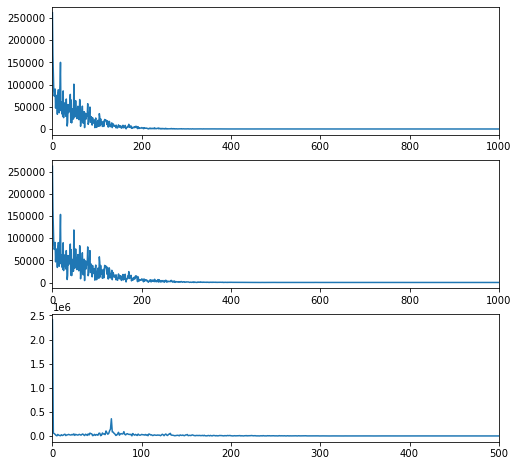

In [9]:
# sample spacing

Xf = fft.fft(x_sol)
Yf = fft.fft(y_sol)
Zf = fft.fft(z_sol)

samp = 1e5
tau = 1/samp # time interval

freq = fft.fftfreq(len(x_sol), tau)

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(3,1,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[1,0])
axs3 = plt.subplot(grid[2,0])

axs1.set_xlim(left=0, right=1000, emit=True, auto=False)
axs2.set_xlim(left=0, right=1000, emit=True, auto=False)
axs3.set_xlim(left=0, right=500, emit=True, auto=False)

axs1.plot(freq[freq>=0], np.abs(Xf)[freq>=0])
axs2.plot(freq[freq>=0], np.abs(Yf)[freq>=0])
axs3.plot(freq[freq>=0], np.abs(Zf)[freq>=0])

plt.show()

# If you want to know more about FFT Bifurcation Analisys, please visit 

## Poincare Section

Draw plots:  30%|█████████████████▉                                         | 30351/100000 [00:00<00:00, 301125.29it/s]

100000


Draw plots: 100%|██████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 407571.69it/s]


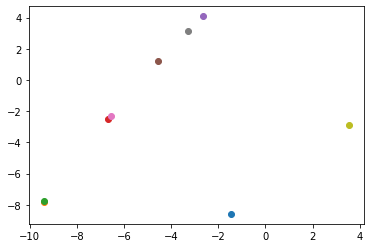

In [20]:
eps = 2.5e-3
tau = 1e-5
print(len(x_sol))

for i in tqdm(range(len(z_sol)),desc="Draw plots"):
    if z_sol[i]>-eps+30:
        if z_sol[i]<eps+30:
            if (z_sol[i+1]-z_sol[i])/(2*tau)<0:
                plt.scatter(x_sol[i], y_sol[i])
                
plt.show()